# Header

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import InterpolatedUnivariateSpline as iuspline
%matplotlib inline

In [4]:
# Check directory
os.chdir("D:\Raphael\Dropbox\Mcgill\JupyterNotebook\PHYS512")
os.getcwd()

'D:\\Raphael\\Dropbox\\Mcgill\\JupyterNotebook\\PHYS512'

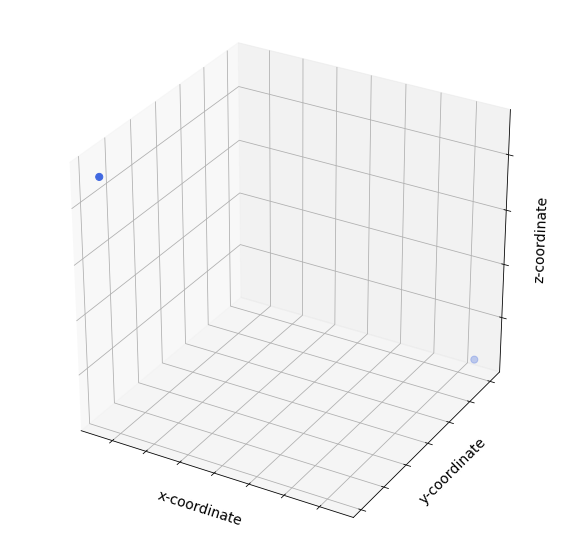

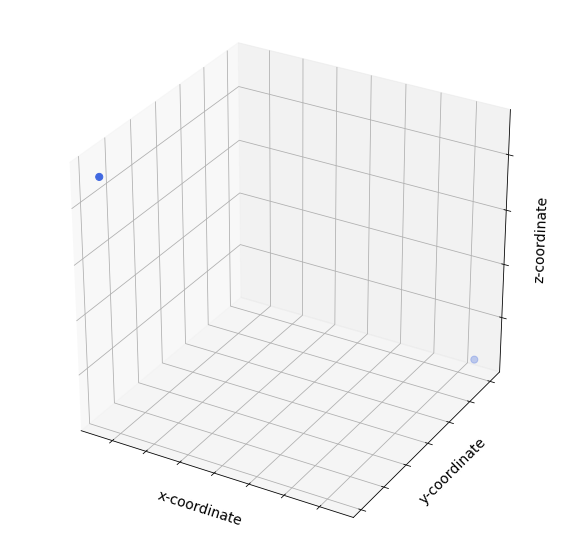

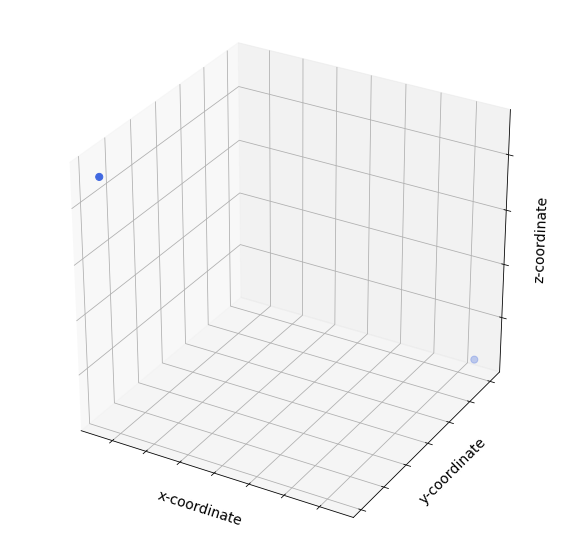

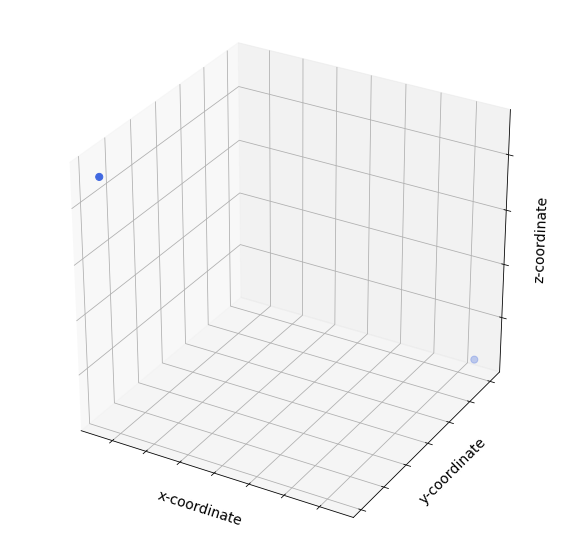

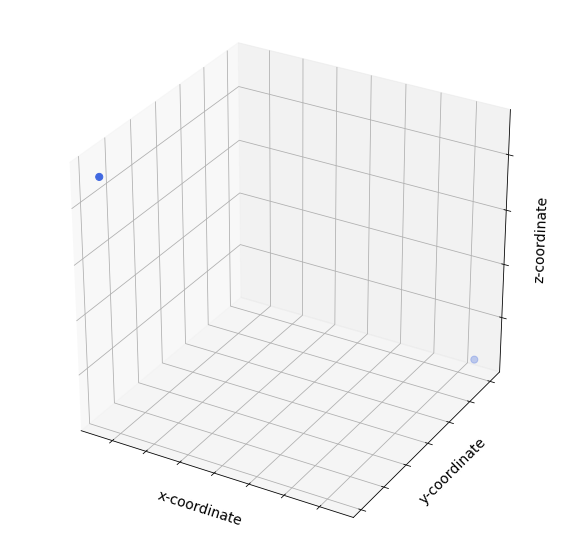

In [36]:
class Particles:
    def __init__(self,x,v,m):
        self.x=x.copy()
        self.v=v.copy()
        try:
            self.m=m.copy()
        except:
            self.m=m
        self.f=np.empty(x.shape)
        self.n=self.x.shape[0]
    def get_forces(self):
        self.f[:]=0
        for i in range(self.n):
            for j in range(self.n):
                for k in range(self.n):
                    if i!=j and i!=k and j!=k:
                        dx=-self.x[i,:]+self.x[j,:]
                        drsqr=np.sum(dx**2)
                        r=np.sqrt(drsqr)
                        self.f[i,:]=self.f[i,:]+dx*self.m[j]/(r*drsqr)
    def update(self,dt):
        self.get_forces()
        self.x=self.x+dt*self.v
        self.v=self.v+dt*self.f
        
n=2
x=np.random.randn(n,3)
v=np.random.randn(n,3)*0
m=np.ones(n)
parts=Particles(x,v,m)
dt=0.1
for i in range(50):
    #print('step ',i)
    #print(parts.x)
    if i%10==0:
        plot_graph3D(np.transpose(x),scale_factor=10000)
    parts.update(dt)


In [37]:
def plot_graph3D(istate, title ="", scale_factor = 1,save=False):
    #Create figure
    #Need to convert to physical coordinates
    fig=plt.figure(figsize=(10,10))#Create 3D axes
    try: ax=fig.add_subplot(111,projection="3d")
    except : ax=Axes3D(fig) 
    ax.scatter(istate[0],istate[1], istate[2],color="royalblue",marker=".",s=.02*scale_factor)
    ax.set_xlabel("x-coordinate",fontsize=14)
    ax.set_ylabel("y-coordinate",fontsize=14)
    ax.set_zlabel("z-coordinate",fontsize=14)
    ax.set_title(title,fontsize=20)
    #ax.legend(loc="upper left",fontsize=14)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    if save:
        plt.savefig('3dinitial.png', dpi=1200)

In [38]:
np.transpose(x)[0]

array([0.154389 , 0.0856147])